In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Paths to data files
train_csv = os.path.expanduser("/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2025_rev/data/df_cleaned_20250617.csv")
test_csv_mapillary  = "data/stvgp_ab_study_w_mapillary_noclamp.csv"
test_csv_311 = "data/stvgp_ab_study_w_311_noclamp.csv"

# Load and preprocess training data
df_train = pd.read_csv(train_csv, parse_dates=['timestamp'])
df_train = df_train.dropna(subset=['ground_truth'])  # only actual observations

# Load prediction results
df_test_mapillary = pd.read_csv(test_csv_mapillary, parse_dates=['timestamp'])
df_test_311 = pd.read_csv(test_csv_311, parse_dates=['timestamp'])

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/355163968.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test_mapillary = pd.read_csv(test_csv_mapillary, parse_dates=['timestamp'])
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/355163968.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test_311 = pd.read_csv(test_csv_311, parse_dates=['timestamp'])


In [2]:
print(df_test_mapillary.shape)
print(df_test_311.shape)

(13430366, 56)
(13218664, 56)


In [3]:
# Convert the seconds‐since‐epoch column to datetime
df_test_mapillary['timestamp'] = pd.to_datetime(df_test_mapillary['timestamp'], unit='s').dt.date
df_test_311['timestamp'] = pd.to_datetime(df_test_311['timestamp'], unit='s').dt.date

# Make sure both dataframes have the same date format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp']).dt.date

# Rename columns for consistency
df_train.rename(columns={'ground_truth': 'count'}, inplace=True)
df_test_mapillary.rename(columns={'pred_mean_Y': 'count','pred_var_Y':'var','rate_median':'median','rate_lower95':'lower95','rate_upper95':'upper95','rate_lower90':'lower90','rate_upper90':'upper90'}, inplace=True)
df_test_311.rename(columns={'pred_mean_Y': 'count','pred_var_Y':'var','rate_median':'median','rate_lower95':'lower95','rate_upper95':'upper95','rate_lower90':'lower90','rate_upper90':'upper90'}, inplace=True)

# Add a 'category' column to distinguish between training and prediction data
df_train['category'] = 'train'
df_test_mapillary['category'] = 'prediction'
df_test_311['category'] = 'prediction'

# Create a empty columns to combine two dataframes
df_train['median'] = np.nan
df_train['var'] = np.nan
df_train['lower95'] = np.nan
df_train['upper95'] = np.nan
df_train['lower90'] = np.nan
df_train['upper90'] = np.nan

# Combine the two dataframes
df_combined_mapillary = pd.concat([df_train, df_test_mapillary], ignore_index=True)
df_combined_311 = pd.concat([df_train, df_test_311], ignore_index=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/1655806446.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_test_mapillary['timestamp'] = pd.to_datetime(df_test_mapillary['timestamp'], unit='s').dt.date
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/1655806446.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_test_311['timestamp'] = pd.to_datetime(df_test_311['timestamp'], unit='s').dt.date


In [4]:
# Needed columns
needed_columns = ['timestamp', 'bboxid','GEOID', 'count', 'median', 'var', 'lower95', 'upper95', 'lower90', 'upper90', 'category']
df_combined_mapillary = df_combined_mapillary[needed_columns]
df_combined_311 = df_combined_311[needed_columns]

# # Fill Nan values with count values of each row
df_combined_mapillary['median'].fillna(df_combined_mapillary['count'], inplace=True)
df_combined_mapillary['var'].fillna(0, inplace=True)
df_combined_mapillary['lower95'].fillna(df_combined_mapillary['count'], inplace=True)
df_combined_mapillary['upper95'].fillna(df_combined_mapillary['count'], inplace=True)
df_combined_mapillary['lower90'].fillna(df_combined_mapillary['count'], inplace=True)
df_combined_mapillary['upper90'].fillna(df_combined_mapillary['count'], inplace=True)

df_combined_311['median'].fillna(df_combined_311['count'], inplace=True)
df_combined_311['var'].fillna(0, inplace=True)
df_combined_311['lower95'].fillna(df_combined_311['count'], inplace=True)
df_combined_311['upper95'].fillna(df_combined_311['count'], inplace=True)
df_combined_311['lower90'].fillna(df_combined_311['count'], inplace=True)
df_combined_311['upper90'].fillna(df_combined_311['count'], inplace=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/683808304.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined_mapillary['median'].fillna(df_combined_mapillary['count'], inplace=True)
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_95365/683808304.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [7]:
print(df_combined_mapillary.shape)
print(df_combined_311.shape)

(13702358, 11)
(13490656, 11)


In [6]:
# Load ground-truth sf data
df_sf = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2025_rev/data/sf_tent.csv')

# Drop rows with NaN in 'date' column
df_sf = df_sf.dropna(subset=['date'], axis=0)

# Create timestamp column in df_sf using year, month, and day
df_sf.rename(columns={'date': 'day'}, inplace=True)
df_sf['timestamp'] = pd.to_datetime(df_sf[['year', 'month', 'day']])

## Ablation Study: Monte Carlo Aggregation

### With Mapillary Data Only

In [12]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.7   # drop any box whose P(Y>0) < 0.7
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_70_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_70_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_70_mapillary['timestamp'] = pd.to_datetime(df_daily_70_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_70_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_70 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_70 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_70 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_70 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_70:.3f}")
print(f"MAPE (%): {mape_mapillary_70:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_70:.4f}")
print(f"NLPD: {nlpd_mapillary_70:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:15<00:00, 201.62it/s]


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      15.990          16.0    9.000   24.000     10.0    23.05
1  2016-01-02      25.120          25.0   16.000   34.525     17.0    33.00
2  2016-01-03      31.100          31.0   19.475   41.525     22.0    40.00
3  2016-01-04      40.004          40.0   29.000   52.525     30.0    51.00
4  2016-01-05      30.866          31.0   21.000   41.000     22.0    40.00
Lambda threshold: 0.7
RMSE: 394.379
MAPE (%): 89.81
Mean Poisson Deviance: 1335.4833
NLPD: 671.5931


In [13]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.5   # drop any box whose P(Y>0) < 0.5
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_50_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_50_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_50_mapillary['timestamp'] = pd.to_datetime(df_daily_50_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_50_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_50 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_50 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_50 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_50 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_50:.3f}")
print(f"MAPE (%): {mape_mapillary_50:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_50:.4f}")
print(f"NLPD: {nlpd_mapillary_50:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:19<00:00, 158.10it/s]


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      39.996          39.5   28.475   53.000    30.00    50.00
1  2016-01-02      68.710          69.0   53.475   84.000    55.00    82.00
2  2016-01-03      70.766          70.0   54.000   88.000    56.00    86.00
3  2016-01-04     102.458         102.0   83.475  124.000    86.00   120.05
4  2016-01-05      85.472          85.0   69.000  105.525    70.95   101.00
Lambda threshold: 0.5
RMSE: 346.380
MAPE (%): 73.66
Mean Poisson Deviance: 640.3837
NLPD: 324.0433


In [14]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.6   # drop any box whose P(Y>0) < 0.6
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_60_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_60_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_60_mapillary['timestamp'] = pd.to_datetime(df_daily_60_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_60_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_60 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_60 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_60 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_60 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_60:.3f}")
print(f"MAPE (%): {mape_mapillary_60:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_60:.4f}")
print(f"NLPD: {nlpd_mapillary_60:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:19<00:00, 155.51it/s]

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      39.792          40.0   27.000   54.000    29.95    52.00
1  2016-01-02      68.926          69.0   54.000   85.050    56.00    82.00
2  2016-01-03      70.732          71.0   55.000   86.000    58.00    84.05
3  2016-01-04     102.606         102.0   83.000  123.000    87.00   119.00
4  2016-01-05      85.402          85.0   68.475  103.525    70.00   101.00
Lambda threshold: 0.6
RMSE: 346.592
MAPE (%): 73.71
Mean Poisson Deviance: 641.9589
NLPD: 324.8309


In [15]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.55   # drop any box whose P(Y>0) < 0.55
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_55_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_55_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_55_mapillary['timestamp'] = pd.to_datetime(df_daily_55_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_55_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_55 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_55 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_55 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_55 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_55:.3f}")
print(f"MAPE (%): {mape_mapillary_55:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_55:.4f}")
print(f"NLPD: {nlpd_mapillary_55:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:22<00:00, 139.15it/s]

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      40.170          40.0   27.000     55.0     28.0     52.0
1  2016-01-02      68.800          68.0   53.000     87.0     55.0     82.0
2  2016-01-03      70.770          70.0   56.000     88.0     58.0     85.0
3  2016-01-04     102.016         102.0   81.475    120.0     85.0    118.0
4  2016-01-05      84.908          85.0   68.000    102.0     70.0    100.0
Lambda threshold: 0.55
RMSE: 346.461
MAPE (%): 73.70
Mean Poisson Deviance: 641.1974
NLPD: 324.4501


In [22]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.4   # drop any box whose P(Y>0) < 0.4
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_40_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_40_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_40_mapillary['timestamp'] = pd.to_datetime(df_daily_40_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_40_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_40 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_40 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_40 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_40 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_40:.3f}")
print(f"MAPE (%): {mape_mapillary_40:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_40:.4f}")
print(f"NLPD: {nlpd_mapillary_40:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:30<00:00, 102.25it/s]


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      39.954          40.0    27.00   52.000     29.0    50.00
1  2016-01-02      68.358          68.0    53.00   85.000     55.0    83.00
2  2016-01-03      71.826          72.0    55.00   89.000     58.0    86.05
3  2016-01-04     102.542         103.0    82.00  123.050     85.0   119.00
4  2016-01-05      85.616          86.0    66.95  104.525     70.0   102.00
Lambda threshold: 0.4
RMSE: 346.532
MAPE (%): 73.71
Mean Poisson Deviance: 641.6726
NLPD: 324.6877


In [23]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.3   # drop any box whose P(Y>0) < 0.3
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_30_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_30_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_30_mapillary['timestamp'] = pd.to_datetime(df_daily_30_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_30_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_30 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_30 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_30 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_30 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_30:.3f}")
print(f"MAPE (%): {mape_mapillary_30:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_30:.4f}")
print(f"NLPD: {nlpd_mapillary_30:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:20<00:00, 152.54it/s]

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      39.588          39.0   28.000     51.0     29.0    50.00
1  2016-01-02      68.820          69.0   52.475     86.0     54.0    83.00
2  2016-01-03      70.362          70.0   55.475     88.0     57.0    84.00
3  2016-01-04     102.574         102.0   83.000    122.0     86.0   119.05
4  2016-01-05      84.666          85.0   68.475    103.0     71.0    99.00
Lambda threshold: 0.3
RMSE: 346.458
MAPE (%): 73.69
Mean Poisson Deviance: 641.2370
NLPD: 324.4699


In [24]:
# With Mapillary Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.1   # drop any box whose P(Y>0) < 0.1
daily_out  = []
n_days     = df_combined_mapillary['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_mapillary.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_10_mapillary = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_10_mapillary.head())

# Make sure the timestamp is in datetime format
df_daily_10_mapillary['timestamp'] = pd.to_datetime(df_daily_10_mapillary['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_10_mapillary[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_mapillary_10 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_mapillary_10 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_mapillary_10 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_mapillary_10 = -np.mean(logps)

print(f"Lambda threshold: {p_thresh}")
print(f"RMSE: {rmse_mapillary_10:.3f}")
print(f"MAPE (%): {mape_mapillary_10:.2f}")
print(f"Mean Poisson Deviance: {mpd_mapillary_10:.4f}")
print(f"NLPD: {nlpd_mapillary_10:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:19<00:00, 157.17it/s]

    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01      39.856          39.0   29.000     53.0     30.0    51.00
1  2016-01-02      69.230          69.0   53.000     87.0     55.0    85.00
2  2016-01-03      71.348          71.0   54.475     88.0     57.0    85.05
3  2016-01-04     101.582         102.0   80.475    119.0     84.0   117.00
4  2016-01-05      84.472          85.0   66.000    101.0     68.0    98.05
Lambda threshold: 0.1
RMSE: 346.495
MAPE (%): 73.72
Mean Poisson Deviance: 641.3789
NLPD: 324.5409


In [25]:
# Combine all metrics into a single DataFrame for easier comparison
df_metrics_mapillary = pd.DataFrame({
    'p_thresh': [0.1, 0.3, 0.4, 0.5, 0.55, 0.6, 0.7],
    'RMSE': [rmse_mapillary_10, rmse_mapillary_30, rmse_mapillary_40, rmse_mapillary_50, rmse_mapillary_55, rmse_mapillary_60, rmse_mapillary_70],
    'MAPE(%)': [mape_mapillary_10, mape_mapillary_30, mape_mapillary_40, mape_mapillary_50, mape_mapillary_55, mape_mapillary_60, mape_mapillary_70],
    'Mean Poisson Deviance': [mpd_mapillary_10, mpd_mapillary_30, mpd_mapillary_40, mpd_mapillary_50, mpd_mapillary_55, mpd_mapillary_60, mpd_mapillary_70],
    'NLPD': [nlpd_mapillary_10, nlpd_mapillary_30, nlpd_mapillary_40, nlpd_mapillary_50, nlpd_mapillary_55, nlpd_mapillary_60, nlpd_mapillary_70]
})

df_metrics_mapillary.to_csv("data/ab_study_results_mapillary.csv", index=False)

### With 311 Data Only

In [18]:
# With 311 Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.7   # drop any box whose P(Y>0) < 0.7
daily_out  = []
n_days     = df_combined_311['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_311.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_70_311 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_70_311.head())

# Make sure the timestamp is in datetime format
df_daily_70_311['timestamp'] = pd.to_datetime(df_daily_70_311['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_70_311[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_311_70 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_311_70 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_311_70 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_311_70 = -np.mean(logps)

print(f"RMSE: {rmse_311_70:.3f}")
print(f"MAPE (%): {mape_311_70:.2f}")
print(f"Mean Poisson Deviance: {mpd_311_70:.4f}")
print(f"NLPD: {nlpd_311_70:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [01:34<00:00, 32.49it/s] 


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01     350.300         351.0  311.000  389.525    320.0    382.0
1  2016-01-02     351.982         353.0  311.000  390.000    320.0    384.0
2  2016-01-03     364.410         364.0  326.475  401.000    333.0    396.0
3  2016-01-04     354.618         354.0  318.425  393.000    325.0    386.0
4  2016-01-05     340.608         341.0  306.475  378.000    312.0    372.0
RMSE: 293.627
MAPE (%): 61.52
Mean Poisson Deviance: 203.3061
NLPD: 105.5045


In [19]:
# With 311 Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.75   # drop any box whose P(Y>0) < 0.75
daily_out  = []
n_days     = df_combined_311['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_311.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_75_311 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_75_311.head())

# Make sure the timestamp is in datetime format
df_daily_75_311['timestamp'] = pd.to_datetime(df_daily_75_311['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_75_311[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_311_75 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_311_75 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_311_75 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_311_75 = -np.mean(logps)

print(f"RMSE: {rmse_311_75:.3f}")
print(f"MAPE (%): {mape_311_75:.2f}")
print(f"Mean Poisson Deviance: {mpd_311_75:.4f}")
print(f"NLPD: {nlpd_311_75:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [00:33<00:00, 92.22it/s] 


    timestamp  mean_total  median_total  lower95  upper95  lower90  upper90
0  2016-01-01     125.352         126.0  103.000  149.525   105.95    145.0
1  2016-01-02     134.072         134.0  112.000  155.000   117.00    153.0
2  2016-01-03     141.162         141.0  120.475  163.000   123.00    160.0
3  2016-01-04     140.282         140.0  116.000  163.000   121.00    160.0
4  2016-01-05     132.142         132.0  111.475  155.000   115.00    150.0
RMSE: 345.337
MAPE (%): 73.36
Mean Poisson Deviance: 631.0966
NLPD: 319.3997


In [20]:
# With 311 Data only
# Monte Carlo aggregation to city‐daily totals with P(Y>0) thresholding
S          = 500
p_thresh   = 0.6   # drop any box whose P(Y>0) < 0.6
daily_out  = []
n_days     = df_combined_311['timestamp'].nunique()

# z‐score for 95% CI
z95 = 1.96
z90 = 1.645

from tqdm import tqdm

# additions inside your loop (store city-level lambda draws for NLPD
lambda_draws_by_day = {}  # timestamp -> np.array of Λ_s

for day, grp in tqdm(df_combined_311.groupby('timestamp'),
                     total=n_days,
                     desc="Aggregating city totals"):
    
    # pull out your per-box summaries
    med   = grp['median'].values    # median λ_i
    l95   = grp['lower95'].values
    # compute P(Y_i > 0) ≈ 1 - exp(-med)
    p_any = 1 - np.exp(-med)
    
    # keep only boxes likely to have tents
    keep_mask = p_any >= p_thresh
    if not keep_mask.any():
        # no boxes pass the threshold → zero tents
        daily_out.append({
            'timestamp':  day,
            'mean_total': 0.0,
            'median_total': 0.0,
            'lower95': 0.0,
            'upper95': 0.0,
            'lower90': 0.0,
            'upper90': 0.0,
        })
        continue
    
    med_filt = med[keep_mask]
    l95_filt = l95[keep_mask]
    nbox     = med_filt.size
    
    # reconstruct log-normal latent params
    mu_f    = np.log(med_filt)
    sigma_f = (np.log(med_filt) - np.log(l95_filt)) / z95
    
    # Monte Carlo draws
    f_samps = np.random.normal(
        loc=mu_f[None, :],
        scale=sigma_f[None, :],
        size=(S, nbox)
    )
    lam_samps = np.exp(f_samps)
    # optional hard cap
    lam_samps = np.minimum(lam_samps, 1e3)

    # draw Poisson counts and sum
    y_samps     = np.random.poisson(lam_samps)
    city_samps  = y_samps.sum(axis=1)

    # Store city-level lambda draws (Λ_s = sum_i λ_{i,s}) for NLPD
    lambda_draws_by_day[day] = lam_samps.sum(axis=1)

    # store summary
    daily_out.append({
        'timestamp':    day,
        'mean_total':   city_samps.mean(),
        'median_total': np.median(city_samps),
        'lower95':      np.percentile(city_samps, 2.5),
        'upper95':      np.percentile(city_samps, 97.5),
        'lower90':      np.percentile(city_samps, 5.0),
        'upper90':      np.percentile(city_samps, 95.0),
    })

# assemble final daily DataFrame
df_daily_60_311 = (
    pd.DataFrame(daily_out)
      .sort_values('timestamp')
      .reset_index(drop=True)
)
print(df_daily_60_311.head())

# Make sure the timestamp is in datetime format
df_daily_60_311['timestamp'] = pd.to_datetime(df_daily_60_311['timestamp'])
df_sf['timestamp'] = pd.to_datetime(df_sf['timestamp'])

# Align by timestamp (use the ground-truth date restriction you intended)
df_eval = (
    df_sf[df_sf['timestamp'] < '2024-06-01'][['timestamp','tents']]
    .merge(df_daily_60_311[['timestamp','mean_total']], on='timestamp', how='inner')
    .rename(columns={'tents':'y','mean_total':'yhat'})
    .sort_values('timestamp')
    .reset_index(drop=True)
)

y    = df_eval['y'].to_numpy(dtype=float)
yhat = df_eval['yhat'].to_numpy(dtype=float)

# Metrics
EPS = 1e-12

# RMSE
rmse_311_60 = np.sqrt(np.mean((yhat - y)**2))

# 1) MAPE (you said no zeros in y)
mape_311_60 = np.mean(np.abs(yhat - y) / (y + EPS)) * 100.0

# 2) Mean Poisson Deviance (count-likelihood grounded)
#    D = (2/n) * sum( y*log(y/mu) - (y - mu) )
def mean_poisson_deviance(y, mu, eps=EPS):
    y  = np.asarray(y, dtype=float)
    mu = np.asarray(mu, dtype=float)
    return 2.0 * np.mean(y * (np.log((y + eps) / (mu + eps))) - (y - mu))

mpd_311_60 = mean_poisson_deviance(y, yhat)

# 3) NLPD using a mixture-of-Poissons predictive:
#    For each day t, p(y_t) = (1/S) * sum_s PoissonPMF(y_t | Λ_{t,s})
from scipy.special import gammaln

def log_pois_pmf(k, lam, eps=EPS):
    # vectorized: k is scalar, lam is array
    # log p(k|lam) = k*log(lam) - lam - log(k!)
    return k*np.log(lam + eps) - lam - gammaln(k + 1.0)

def day_log_predictive(k, lambda_draws):
    # log mean of exponentiated log pmfs = log( mean_s exp(log p_s) )
    # use log-sum-exp for stability
    lp = log_pois_pmf(k, lambda_draws)
    m  = np.max(lp)
    return m + np.log(np.mean(np.exp(lp - m) + 0.0))

# Build per-day NLPD by pulling the correct Λ_draws for each timestamp
logps = []
for ts, k in zip(df_eval['timestamp'].tolist(), y.astype(int)):
    lam_draws = lambda_draws_by_day.get(ts, None)
    if lam_draws is None or len(lam_draws) == 0:
        # Fallback: use single Poisson with mean yhat when draws are missing
        lam_draws = np.array([df_eval.loc[df_eval['timestamp']==ts, 'yhat'].item()], dtype=float)
    logps.append(day_log_predictive(k, lam_draws))

nlpd_311_60 = -np.mean(logps)

print(f"RMSE: {rmse_311_60:.3f}")
print(f"MAPE (%): {mape_311_60:.2f}")
print(f"Mean Poisson Deviance: {mpd_311_60:.4f}")
print(f"NLPD: {nlpd_311_60:.4f}")


Aggregating city totals: 100%|██████████| 3074/3074 [13:23<00:00,  3.82it/s]


    timestamp  mean_total  median_total   lower95   upper95  lower90  upper90
0  2016-01-01    4719.576        4717.0  4601.475  4841.575  4619.95  4824.05
1  2016-01-02    4719.748        4715.5  4586.475  4859.575  4612.85  4837.00
2  2016-01-03    4726.028        4730.0  4592.375  4857.625  4616.95  4832.15
3  2016-01-04    4729.552        4726.5  4613.475  4856.000  4620.95  4835.15
4  2016-01-05    4716.778        4710.5  4579.375  4868.050  4603.90  4841.10
RMSE: 4262.163
MAPE (%): 1257.77
Mean Poisson Deviance: 6524.6573
NLPD: 3266.1801


In [21]:
# Combine all the metrics into a single DataFrame for easier comparison
df_metrics_311 = pd.DataFrame({
    'p_thresh': [0.6, 0.7, 0.75],
    'RMSE': [rmse_311_60, rmse_311_70, rmse_311_75],
    'MAPE(%)': [mape_311_60, mape_311_70, mape_311_75],
    'Mean Poisson Deviance': [mpd_311_60, mpd_311_70, mpd_311_75],
    'NLPD': [nlpd_311_60, nlpd_311_70, nlpd_311_75]
})

# Save the metrics
df_metrics_311.to_csv("data/ab_study_results_311.csv", index=False)

### Visualization

In [ ]:
# Merge df_daily_07_311 and df_sf on 'timestamp'
df_merge_70_311 = df_daily_70_311.merge(df_sf[df_sf['timestamp'] < '2024-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [24]:
# Merge df_daily_60_mapillary and df_sf on 'timestamp'
df_merge_60_mapillary = df_daily_60_mapillary.merge(df_sf[df_sf['timestamp'] < '2024-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [22]:
df_merge_70_311.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90,tents,tent_struc
0,2016-01-01,352.328,352.0,318.000,387.525,323.00,382.15,NaN,NaN
1,2016-01-02,354.246,354.5,317.000,392.050,322.95,385.00,NaN,NaN
2,2016-01-03,366.650,367.0,328.000,405.525,334.00,397.05,NaN,NaN
3,2016-01-04,353.022,353.0,318.000,392.000,323.95,384.05,NaN,NaN
4,2016-01-05,340.934,341.0,304.475,375.000,310.00,372.00,NaN,NaN


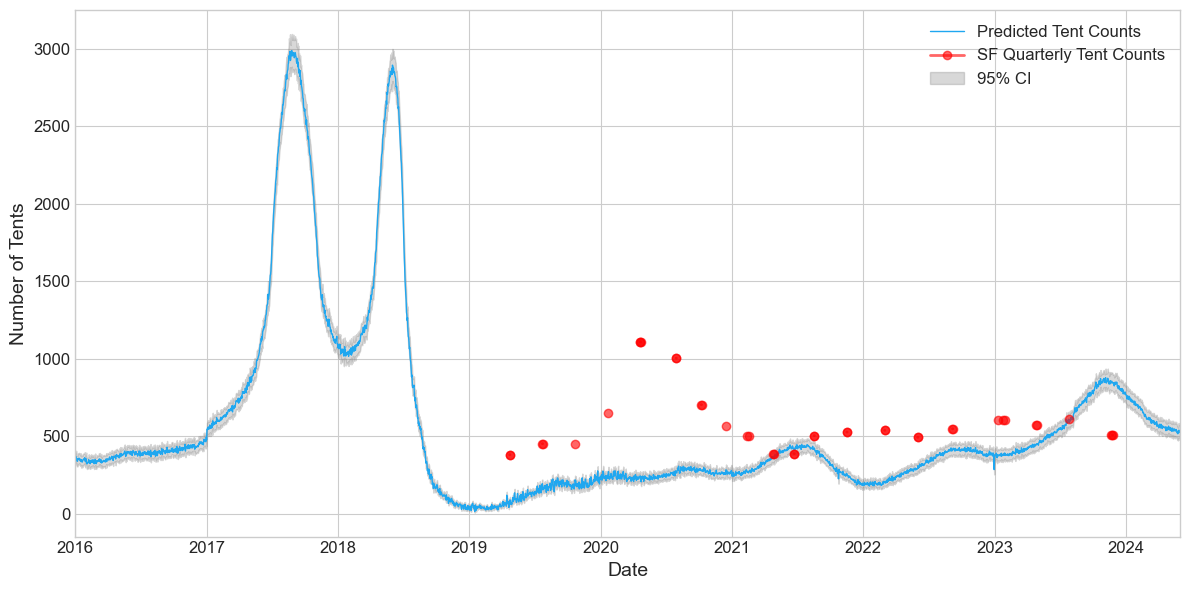

In [ ]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_70_311['timestamp'], 
    df_merge_70_311['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_70_311['timestamp'], 
    df_merge_70_311['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_70_311['timestamp'], 
#     df_merge_70_311['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_70_311['timestamp'],
    df_merge_70_311['lower95'],
    df_merge_70_311['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

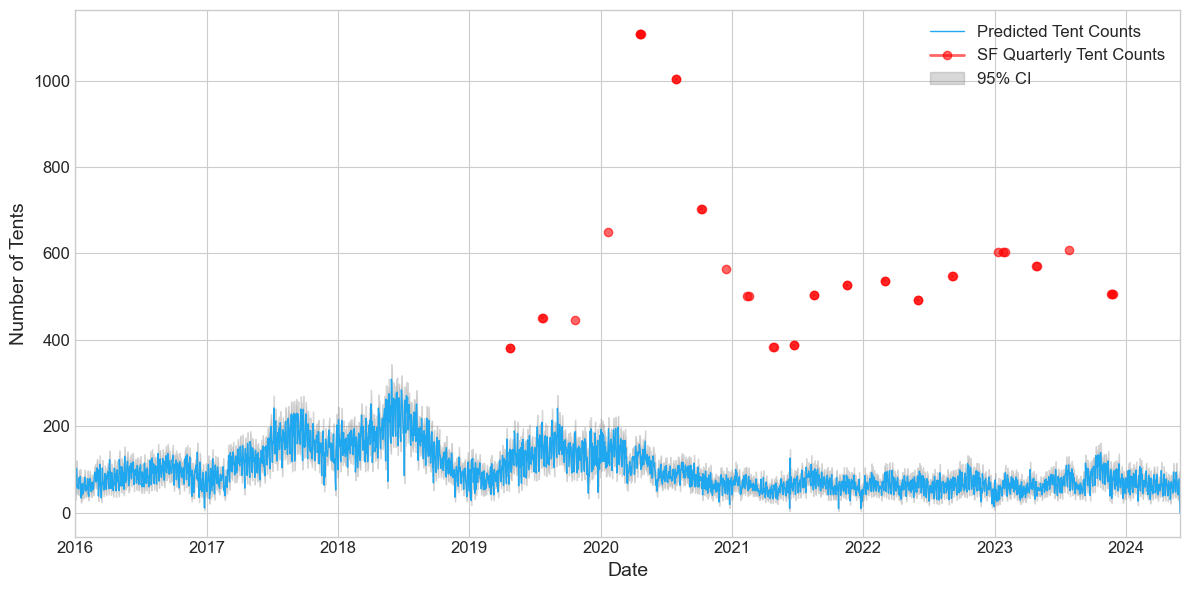

In [25]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_60_mapillary['timestamp'], 
    df_merge_60_mapillary['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_60_mapillary['timestamp'], 
    df_merge_60_mapillary['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_60_mapillary['timestamp'], 
#     df_merge_60_mapillary['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_60_mapillary['timestamp'],
    df_merge_60_mapillary['lower95'],
    df_merge_60_mapillary['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

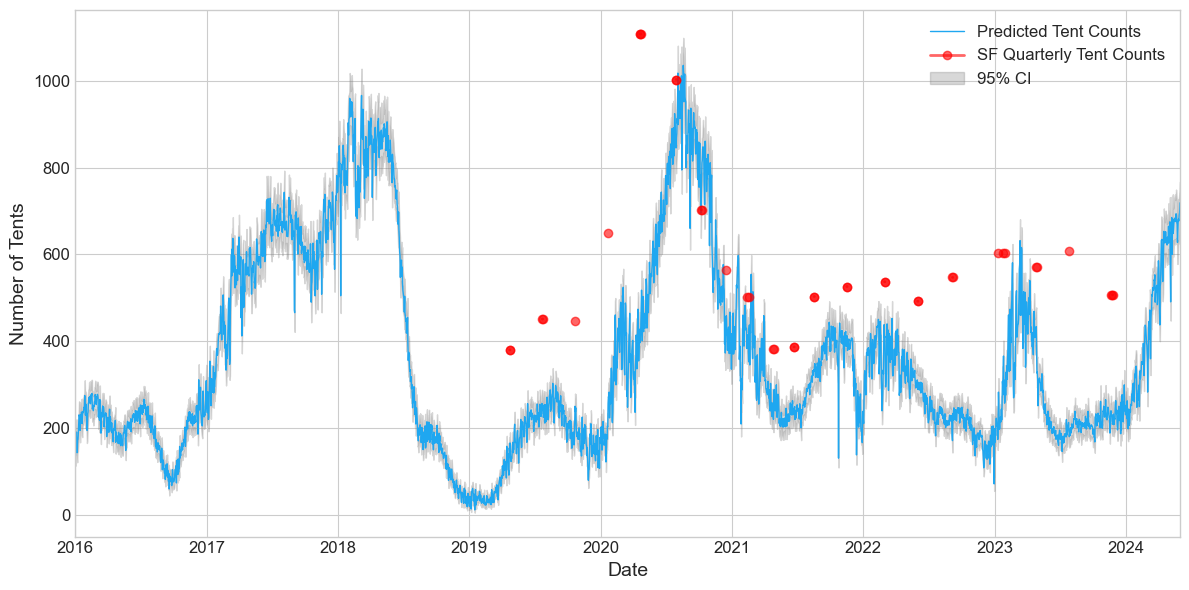

In [58]:
# Threshold: 0.7, no clamping
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07_noclamp['timestamp'], 
    df_merge_07_noclamp['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_07_noclamp['timestamp'], 
    df_merge_07_noclamp['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_07_noclamp['timestamp'], 
#     df_merge_07_noclamp['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_07_noclamp['timestamp'],
    df_merge_07_noclamp['lower95'],
    df_merge_07_noclamp['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

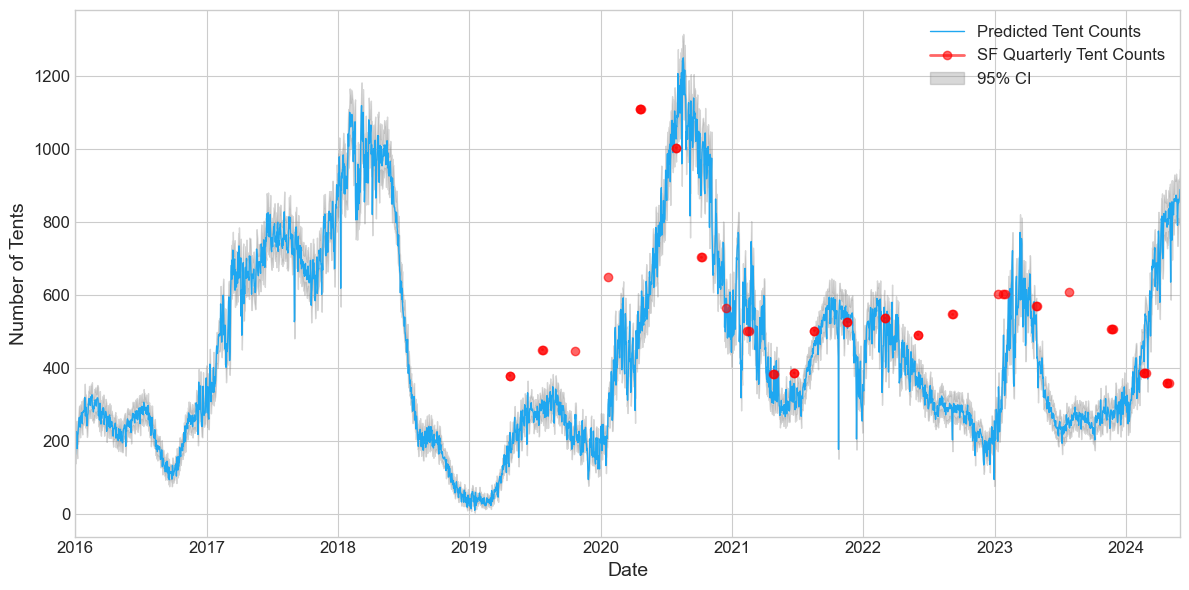

In [65]:
# Threshold: 0.69, no clamping
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_69_noclamp['timestamp'], 
    df_merge_69_noclamp['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_69_noclamp['timestamp'], 
    df_merge_69_noclamp['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_69_noclamp['timestamp'], 
#     df_merge_69_noclamp['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_69_noclamp['timestamp'],
    df_merge_69_noclamp['lower95'],
    df_merge_69_noclamp['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

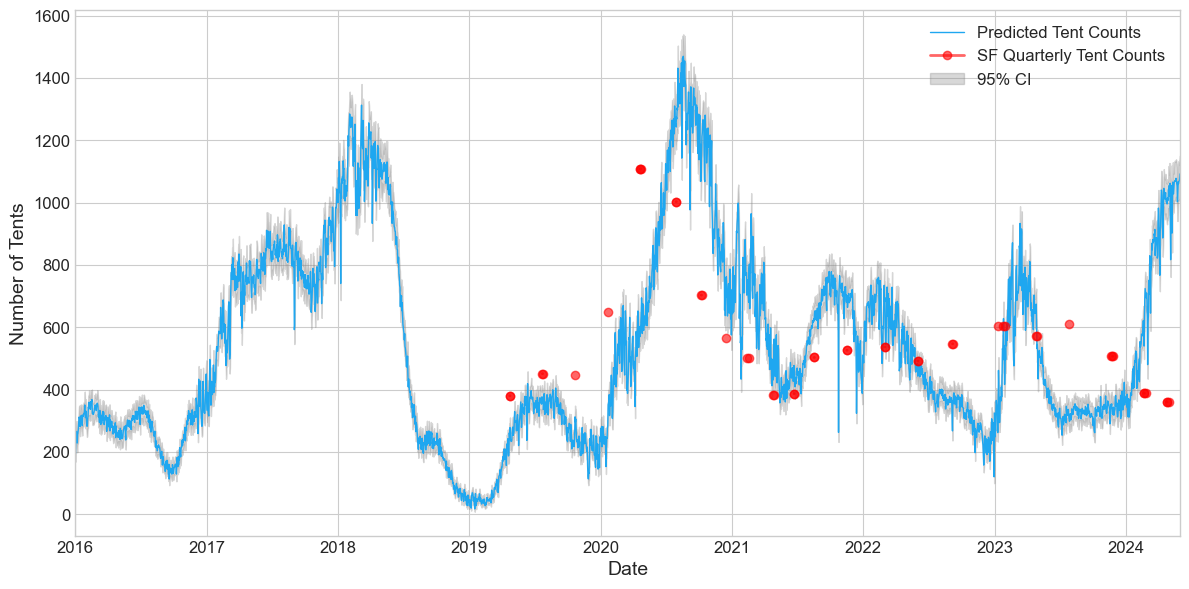

In [ ]:
# Threshold: 0.68, no clamping
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_68_noclamp['timestamp'], 
    df_merge_68_noclamp['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_68_noclamp['timestamp'], 
    df_merge_68_noclamp['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_68_noclamp['timestamp'], 
#     df_merge_68_noclamp['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_68_noclamp['timestamp'],
    df_merge_68_noclamp['lower95'],
    df_merge_68_noclamp['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

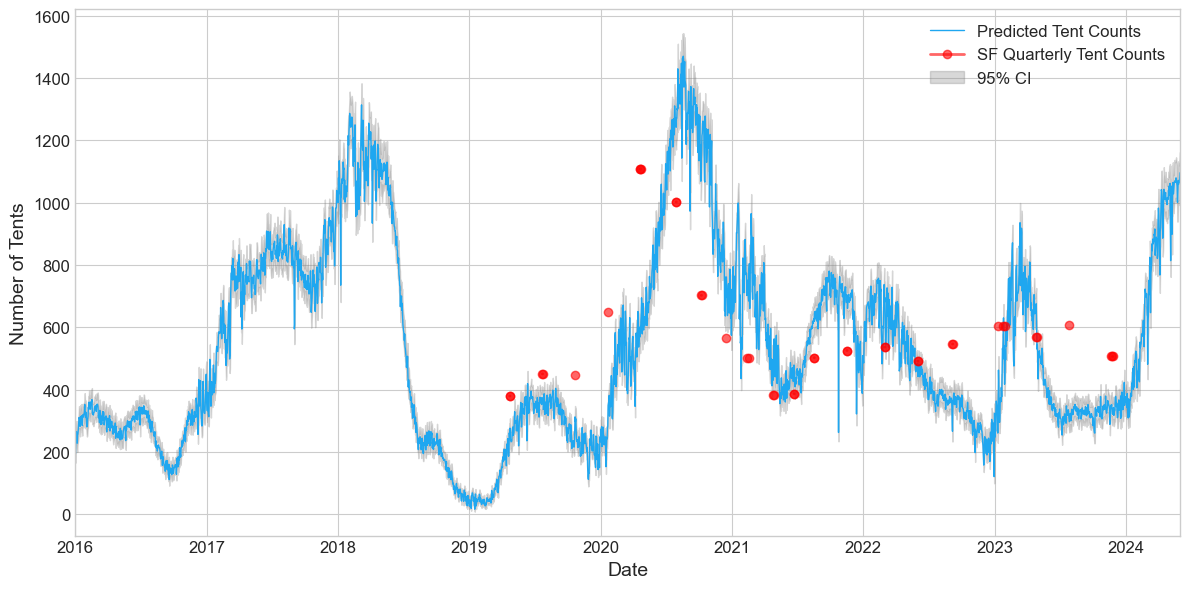

In [ ]:
# Threshold 0.68

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_68['timestamp'], 
    df_merge_68['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_68['timestamp'], 
    df_merge_68['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_68['timestamp'], 
#     df_merge_68['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_68['timestamp'],
    df_merge_68['lower95'],
    df_merge_68['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

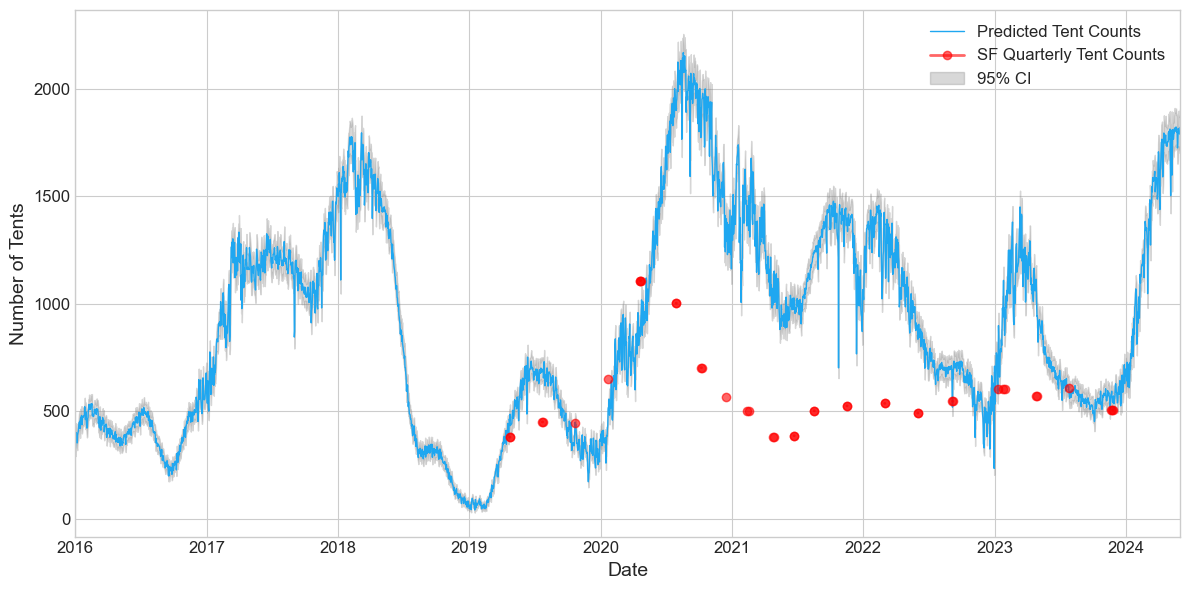

In [39]:
# Threshold 0.65

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_65['timestamp'], 
    df_merge_65['mean_total'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.plot(
    df_merge_65['timestamp'], 
    df_merge_65['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red',
    linewidth=2
)

# plt.bar(
#     df_merge_65['timestamp'], 
#     df_merge_65['tent_struc'], 
#     label='SF Quarterly Tent Counts', 
#     alpha=0.6, 
#     color='k'
# )

# Uncertainty band
plt.fill_between(
    df_merge_65['timestamp'],
    df_merge_65['lower95'],
    df_merge_65['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

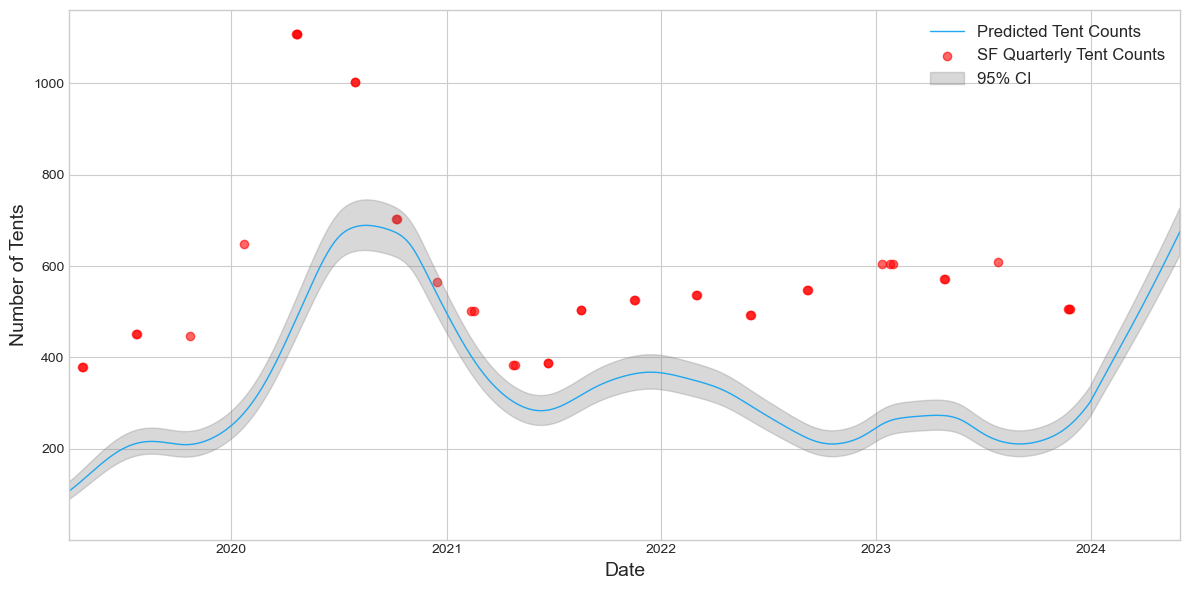

In [34]:
import datetime as dt
import statsmodels.api as sm

lowess_smoothed = sm.nonparametric.lowess(
    df_merge_07['mean_total'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

# Smooth uncertainty bands
df_merge_07['lower95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['lower95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['upper95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['upper95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['smoothed_count'] = lowess_smoothed[:, 1]

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07['timestamp'], 
    df_merge_07['smoothed_count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge_07['timestamp'], 
    df_merge_07['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge_07['timestamp'],
    df_merge_07['lower95_smoothed'],
    df_merge_07['upper95_smoothed'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

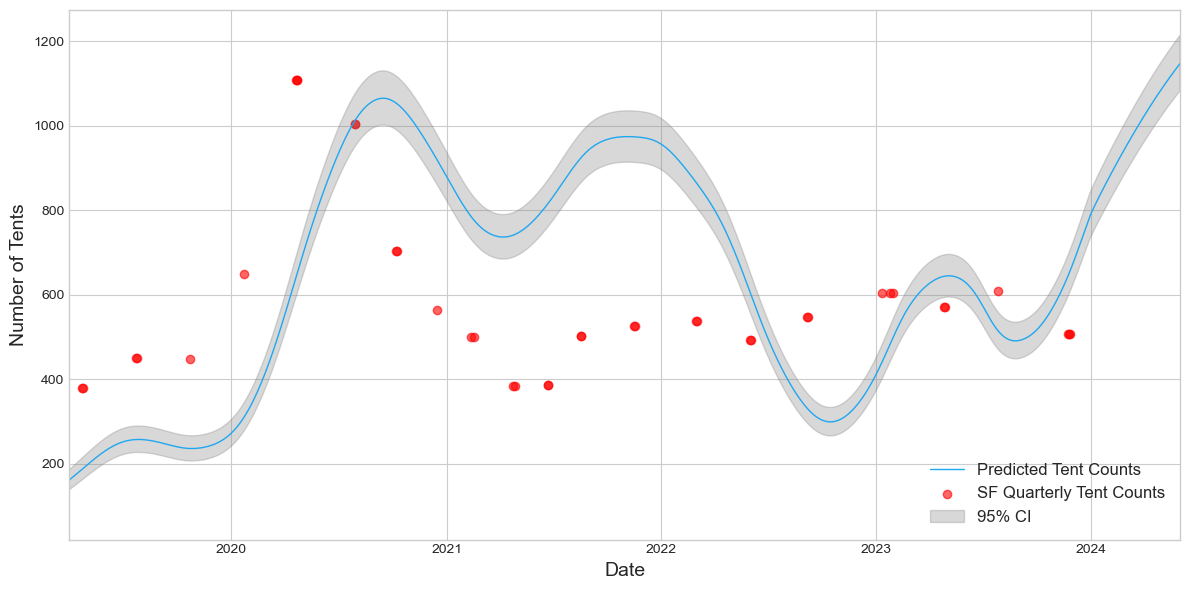

In [ ]:
import datetime as dt
import statsmodels.api as sm

lowess_smoothed = sm.nonparametric.lowess(
    df_merge_07['mean_total'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

# Smooth uncertainty bands
df_merge_07['lower95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['lower95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['upper95_smoothed'] = sm.nonparametric.lowess(
    df_merge_07['upper95'],
    df_merge_07['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge_07['smoothed_count'] = lowess_smoothed[:, 1]

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge_07['timestamp'], 
    df_merge_07['smoothed_count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge_07['timestamp'], 
    df_merge_07['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge_07['timestamp'],
    df_merge_07['lower95_smoothed'],
    df_merge_07['upper95_smoothed'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

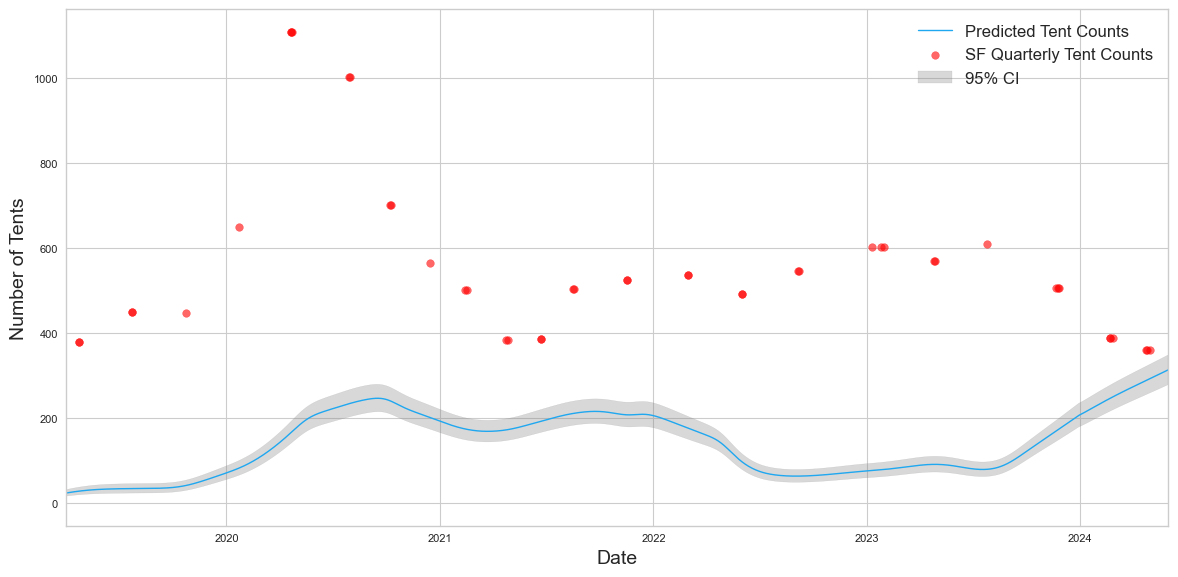

In [235]:
import datetime as dt
import statsmodels.api as sm

lowess_smoothed = sm.nonparametric.lowess(
    df_merge['mean_total'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

# Smooth uncertainty bands
df_merge['lower95_smoothed'] = sm.nonparametric.lowess(
    df_merge['lower95'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge['upper95_smoothed'] = sm.nonparametric.lowess(
    df_merge['upper95'],
    df_merge['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=False
)

df_merge['smoothed_count'] = lowess_smoothed[:, 1]

start_date = dt.datetime(2019, 4, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Predicted mean
plt.plot(
    df_merge['timestamp'], 
    df_merge['smoothed_count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

plt.scatter(
    df_merge['timestamp'], 
    df_merge['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Uncertainty band
plt.fill_between(
    df_merge['timestamp'],
    df_merge['lower95_smoothed'],
    df_merge['upper95_smoothed'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

## Bounding-box level visualization

In [33]:
df_combined

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
0,2016-11-09,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
1,2016-11-10,bbox_10_14,60750604002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
2,2016-11-10,bbox_10_15,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
3,2016-11-09,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
4,2016-11-10,bbox_10_16,60750332043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train
...,...,...,...,...,...,...,...,...,...,...,...
13461041,2024-05-27,bbox_9_68,60750234002,0.908085,0.888231,0.945359,0.588230,1.341237,0.628509,1.255281,prediction
13461042,2024-05-28,bbox_9_68,60750234002,0.907453,0.887577,0.944748,0.587566,1.340772,0.627839,1.254767,prediction
13461043,2024-05-29,bbox_9_68,60750234002,0.906759,0.886813,0.944162,0.586539,1.340810,0.626831,1.254624,prediction
13461044,2024-05-30,bbox_9_68,60750234002,0.905693,0.885764,0.943020,0.585804,1.339316,0.626053,1.253211,prediction


In [43]:
# Top 30 bboxid with most counts in training data
df_combined[df_combined['category']=='train'].groupby('bboxid').agg({'count':'sum'}).sort_values('count', ascending=False).head(100)

,count
bboxid,
bbox_41_43,3566.0
bbox_57_50,3213.0
bbox_51_56,2824.0
bbox_57_49,2458.0
bbox_54_49,2252.0
...,...
bbox_57_66,766.0
bbox_52_55,752.0
bbox_38_46,751.0


In [34]:
df_4143 = df_combined[df_combined['bboxid'] == 'bbox_41_43'].copy()
df_4143['timestamp'] = pd.to_datetime(df_4143['timestamp'])
df_4143.shape

(3074, 11)

In [35]:
df_5849 = df_combined[df_combined['bboxid'] == 'bbox_41_43'].copy()
df_5849['timestamp'] = pd.to_datetime(df_5849['timestamp'])
df_5849.shape

(3074, 11)

In [1]:
df_4143[df_4143['category']=='train']['timestamp'].nunique()

NameError: name 'df_4143' is not defined

In [37]:
df_4143[df_4143['category']=='prediction']['timestamp'].nunique()

1458

In [38]:
df_4143[df_4143['category'] == 'prediction']

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
4282779,2016-01-16,bbox_41_43,60750203003,1.648490,1.643707,1.664328,1.415582,1.908595,1.449986,1.863311,prediction
4282780,2016-01-30,bbox_41_43,60750203003,1.663444,1.659120,1.677885,1.440336,1.911137,1.473445,1.868192,prediction
4282781,2016-01-31,bbox_41_43,60750203003,1.645635,1.641337,1.659836,1.424419,1.891288,1.457241,1.848690,prediction
4282782,2016-02-01,bbox_41_43,60750203003,1.639770,1.635485,1.653875,1.419299,1.884600,1.452010,1.842144,prediction
4282783,2016-02-05,bbox_41_43,60750203003,1.677901,1.673680,1.692120,1.456315,1.923488,1.489242,1.880961,prediction
...,...,...,...,...,...,...,...,...,...,...,...
10830820,2024-05-27,bbox_41_43,60750203003,1.708840,1.704279,1.724494,1.476730,1.966891,1.511137,1.922106,prediction
10830821,2024-05-28,bbox_41_43,60750203003,1.715996,1.711356,1.731986,1.481493,1.976884,1.516236,1.931585,prediction
10830822,2024-05-29,bbox_41_43,60750203003,1.723674,1.718869,1.740307,1.484709,1.989960,1.520068,1.943670,prediction
10830823,2024-05-30,bbox_41_43,60750203003,1.721431,1.716607,1.738111,1.482167,1.988128,1.517562,1.941758,prediction


In [306]:
df_4143[df_4143['category'] == 'prediction']

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
4282779,2016-01-16,bbox_41_43,60750203003,1.662374,1.659030,1.673525,1.464995,1.878764,1.494575,1.841581,prediction
4282780,2016-01-30,bbox_41_43,60750203003,1.682209,1.678876,1.693455,1.483924,1.899441,1.513656,1.862131,prediction
4282781,2016-01-31,bbox_41_43,60750203003,1.670579,1.667239,1.681769,1.472826,1.887316,1.502468,1.850081,prediction
4282782,2016-02-01,bbox_41_43,60750203003,1.670536,1.667184,1.681768,1.472429,1.887699,1.502121,1.850386,prediction
4282783,2016-02-05,bbox_41_43,60750203003,1.713725,1.710362,1.725287,1.512631,1.933941,1.542794,1.896130,prediction
...,...,...,...,...,...,...,...,...,...,...,...
10830820,2024-05-27,bbox_41_43,60750203003,1.895375,1.887205,1.926548,1.572889,2.264333,1.619623,2.198996,prediction
10830821,2024-05-28,bbox_41_43,60750203003,1.904511,1.896257,1.936158,1.579648,2.276325,1.626713,2.210465,prediction
10830822,2024-05-29,bbox_41_43,60750203003,1.932899,1.924417,1.965906,1.601280,2.312763,1.649291,2.245437,prediction
10830823,2024-05-30,bbox_41_43,60750203003,1.925954,1.917472,1.958842,1.594977,2.305174,1.642886,2.237951,prediction


In [271]:
df_4143[df_4143['category'] == 'prediction']

,timestamp,bboxid,GEOID,count,median,var,lower95,upper95,lower90,upper90,category
4282779,2016-01-16,bbox_41_43,60750203003,1.662374,1.659030,1.673525,1.464995,1.878764,1.494575,1.841581,prediction
4282780,2016-01-30,bbox_41_43,60750203003,1.682209,1.678876,1.693455,1.483924,1.899441,1.513656,1.862131,prediction
4282781,2016-01-31,bbox_41_43,60750203003,1.670579,1.667239,1.681769,1.472826,1.887316,1.502468,1.850081,prediction
4282782,2016-02-01,bbox_41_43,60750203003,1.670536,1.667184,1.681768,1.472429,1.887699,1.502121,1.850386,prediction
4282783,2016-02-05,bbox_41_43,60750203003,1.713725,1.710362,1.725287,1.512631,1.933941,1.542794,1.896130,prediction
...,...,...,...,...,...,...,...,...,...,...,...
10830820,2024-05-27,bbox_41_43,60750203003,1.895375,1.887205,1.926548,1.572889,2.264333,1.619623,2.198996,prediction
10830821,2024-05-28,bbox_41_43,60750203003,1.904511,1.896257,1.936158,1.579648,2.276325,1.626713,2.210465,prediction
10830822,2024-05-29,bbox_41_43,60750203003,1.932899,1.924417,1.965906,1.601280,2.312763,1.649291,2.245437,prediction
10830823,2024-05-30,bbox_41_43,60750203003,1.925954,1.917472,1.958842,1.594977,2.305174,1.642886,2.237951,prediction


In [278]:
df_4143.sort_values('timestamp', inplace=True)

In [39]:
df_3946 = df_combined[df_combined['bboxid'] == 'bbox_39_46'].copy()
df_3946['timestamp'] = pd.to_datetime(df_3946['timestamp'])
df_3946.shape

(3074, 11)

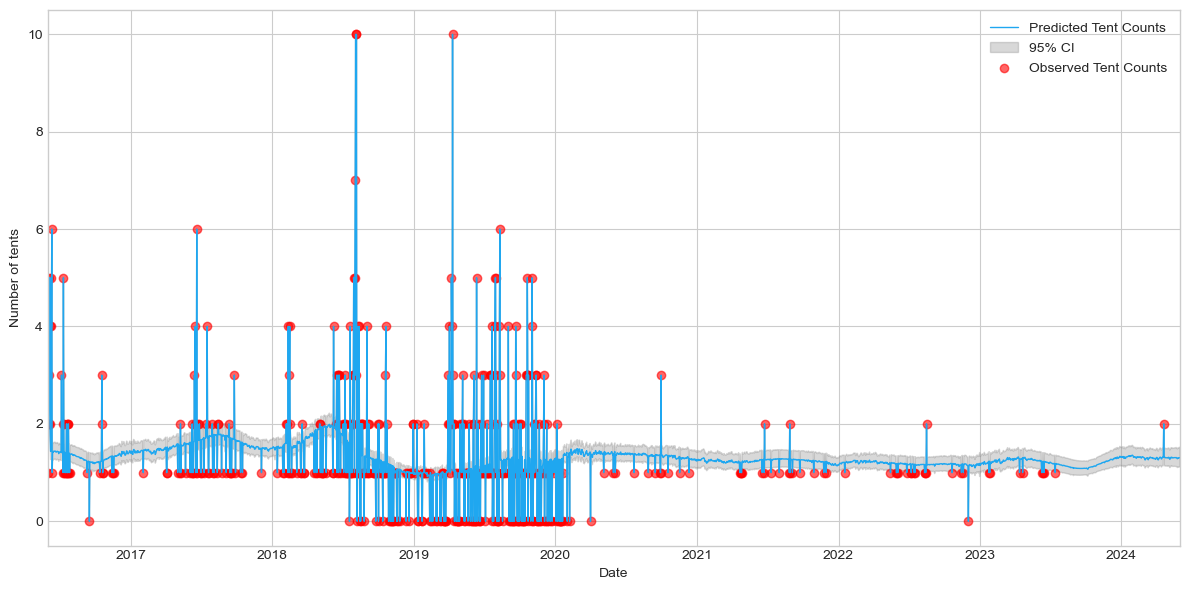

In [45]:
df_3946.sort_values('timestamp', inplace=True)
start_date = dt.datetime(2016, 6, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3946['timestamp'], 
    df_3946['count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3946['timestamp'],
    df_3946['lower95'],
    df_3946['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.scatter(
    df_3946[df_3946['category'] == 'train']['timestamp'], 
    df_3946[df_3946['category'] == 'train']['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.xlim(start_date, end_date)
plt.legend()
plt.tight_layout()
plt.show()

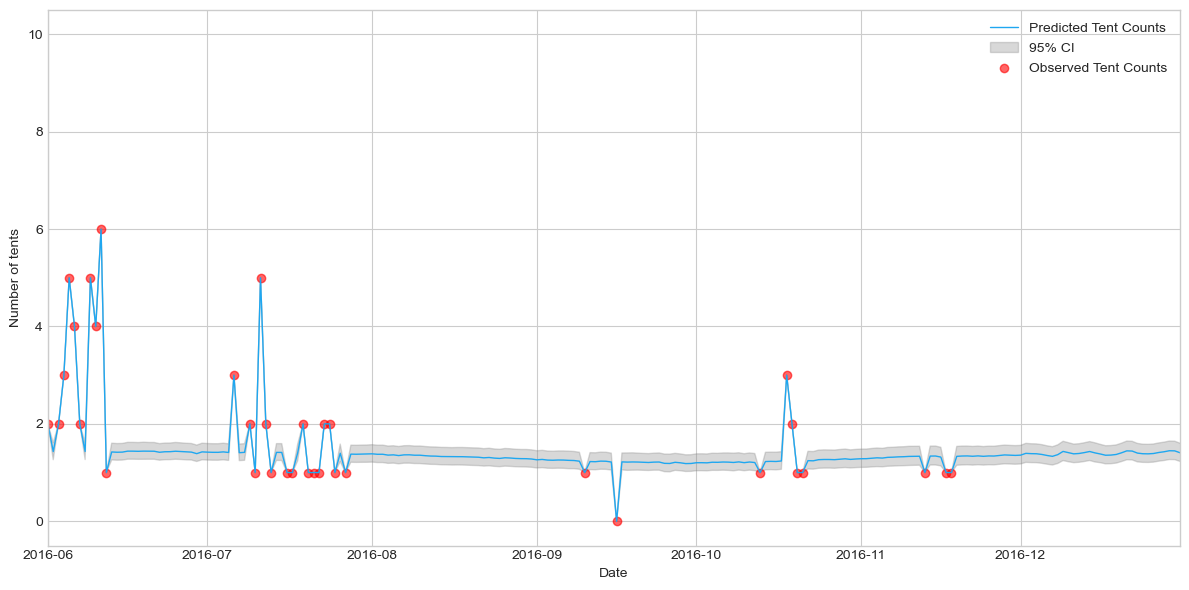

In [41]:
df_3946.sort_values('timestamp', inplace=True)
start_date = dt.datetime(2016, 6, 1)
end_date = dt.datetime(2016, 12, 31)

# Plot time-series
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3946['timestamp'], 
    df_3946['count'], 
    label='Predicted Tent Counts', 
    color='#1FA7F0',
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3946['timestamp'],
    df_3946['lower95'],
    df_3946['upper95'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.scatter(
    df_3946[df_3946['category'] == 'train']['timestamp'], 
    df_3946[df_3946['category'] == 'train']['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.xlim(start_date, end_date)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
print(df_combined.shape)
print(df_test.shape)

(13461046, 11)
(13189054, 23)


In [8]:
# Extract year from timestamp
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])
df_combined['year'] = df_combined['timestamp'].dt.year

# Group by year and bboxid, then sum the counts
yearly_counts = df_combined.groupby(['year', 'bboxid'])['count'].sum().reset_index()

In [9]:
yearly_counts

,year,bboxid,count
0,2016,bbox_10_14,69.017624
1,2016,bbox_10_15,67.527111
2,2016,bbox_10_16,60.490855
3,2016,bbox_10_17,53.426826
4,2016,bbox_10_18,47.087180
...,...,...,...
39406,2024,bbox_9_64,92.022248
39407,2024,bbox_9_65,100.665029
39408,2024,bbox_9_66,113.932628
39409,2024,bbox_9_67,126.381643


In [13]:
# Show all rows in the output
pd.set_option('display.max_columns', None)
df_test.head(2)

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,black_ratio,hh_median_income,ground_truth,latitude,longitude,count,var,median,lower95,upper95,lower90,upper90,category
0,2016-01-01,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",50.0,40.0,0.0,506,0.806324,0.0,53438.0,NaN,37.719862,-122.485353,0.289760,0.295249,0.280728,0.171422,0.459730,0.185565,0.424693,prediction
1,2016-01-02,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",51.0,45.0,0.0,506,0.806324,0.0,53438.0,NaN,37.719862,-122.485353,0.294856,0.300525,0.285688,0.174564,0.467554,0.188946,0.431965,prediction


In [ ]:
# Extract geo info from df_test
geo_info = df_test[['bboxid','geometry_bbox','center_latlon']].drop_duplicates()
yearly_counts = pd.merge(yearly_counts, geo_info, on='bboxid', how='left')

In [27]:
yearly_counts.head()

,year,bboxid,count,geometry_bbox,center_latlon
0,2016,bbox_10_14,69.017624,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)"
1,2016,bbox_10_15,67.527111,POLYGON ((-122.48444469610592 37.7191324443233...,"(37.71985369613769, -122.4835266585265)"
2,2016,bbox_10_16,60.490855,POLYGON ((-122.48261869150517 37.7191244450116...,"(37.719845682477825, -122.48170063648698)"
3,2016,bbox_10_17,53.426826,POLYGON ((-122.48079268762802 37.7191164174201...,"(37.71983764053741, -122.47987461517232)"
4,2016,bbox_10_18,47.087180,POLYGON ((-122.47896668447702 37.7191083615489...,"(37.719829570316485, -122.47804859458512)"


<Axes: >

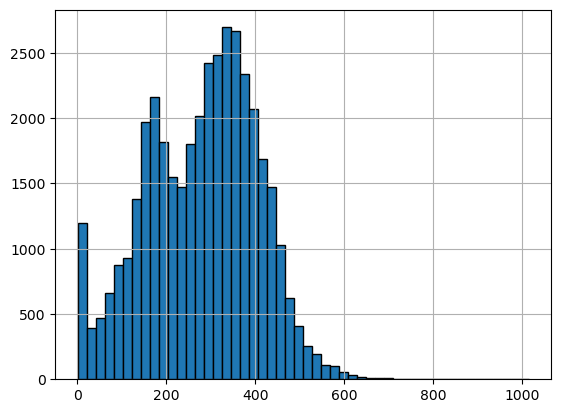

In [28]:
yearly_counts['count'].hist(bins=50, edgecolor='black')

In [23]:
# Convert yearly_counts to geopandas DataFrame
from shapely import wkt
import geopandas as gpd
yearly_counts['geometry_bbox'] = yearly_counts['geometry_bbox'].apply(wkt.loads)

gdf_yearly_counts = gpd.GeoDataFrame(
    yearly_counts,
    geometry='geometry_bbox',
    crs='EPSG:4326'  # Assuming the coordinates are in WGS84
)

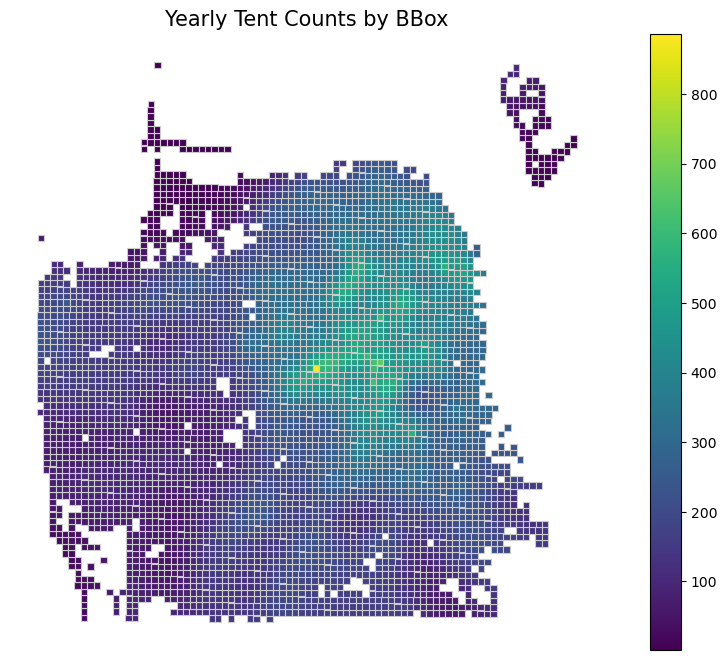

<Axes: >

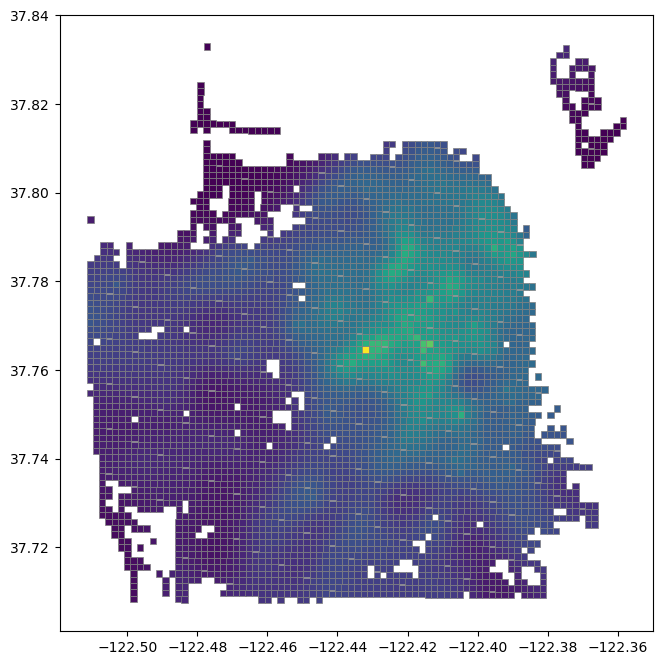

In [37]:
# Heat map of yearly tent counts

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_yearly_counts[gdf_yearly_counts['year'] == 2016].plot(
    column='count',
    cmap='viridis',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title('Yearly Tent Counts by BBox', fontsize=15)
ax.set_axis_off()
plt.show()

# Add map layer
import contextily as ctx
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_yearly_counts[gdf_yearly_counts['year'] == 2016].plot(
    column='count',
    cmap='viridis',
    linewidth=0.5,
    ax=ax,
    edgecolor='0.5',
) 

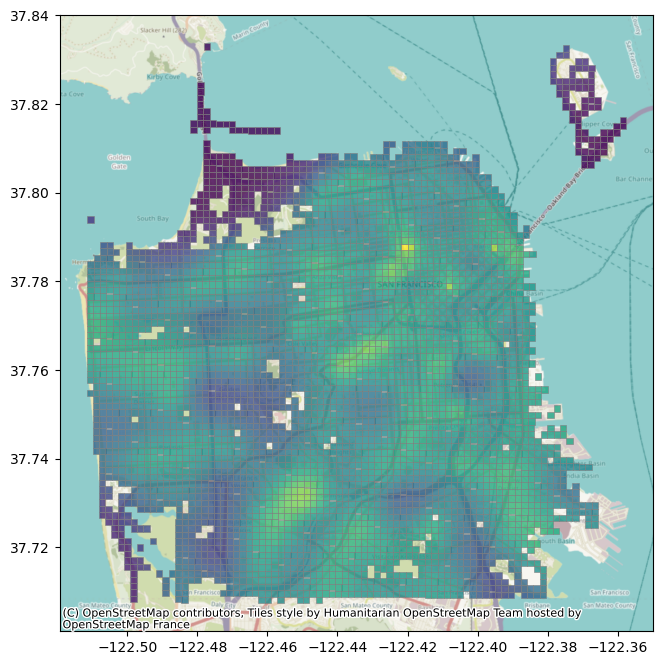

In [65]:
# Heat map of yearly tent counts
# Add map layer
import contextily as ctx
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_yearly_counts[gdf_yearly_counts['year'] == 2021].plot(
    column='count',
    cmap='viridis',
    linewidth=0.5,
    ax=ax,
    edgecolor='0.5',
    alpha=0.8
) 

# Add real map layer
ctx.add_basemap(ax, crs=gdf_yearly_counts.crs.to_string())
